## André Toyama

# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.11 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240, 320)

In [6]:
rintin_gray.flatten()

array([21, 39, 42, ..., 18, 17, 17], dtype=uint8)

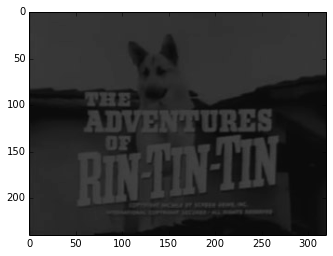

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

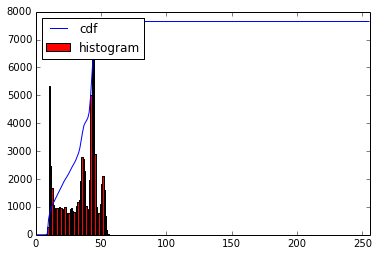

In [8]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

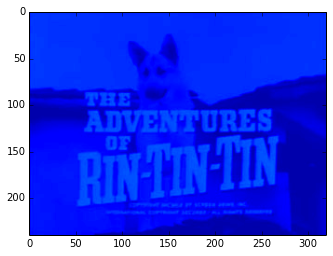

In [9]:
plt.imshow(rintin_gray, vmin=0, vmax=255)

#### O histograma fornecido não apresenta bem a faixa de cores, pois está concentrado entre 0 e 50 aproximadamene, então a grande maioria das cores permance sem uso, resultando no grande espaço em branco no histograma.

In [10]:
max(rintin_gray.flatten())

58

In [11]:
max(bins)

256.0

In [12]:
value = 256.0/58

In [13]:
type(rintin_gray)

numpy.ndarray

In [14]:
rintin_gray.shape

(240, 320)

In [15]:
rintin2 = [i*value for i in rintin_gray]

In [16]:
type(rintin2)

list

In [17]:
rintin3 = [np.asarray(i) for i in rintin2]

#for i in rintin2:
#    rintin3 += np.asarray(i)

In [18]:
rintin3 = np.asarray(rintin3)

In [19]:
type(rintin3)

numpy.ndarray

In [20]:
rintin3.flatten()

array([  92.68965517,  172.13793103,  185.37931034, ...,   79.44827586,
         75.03448276,   75.03448276])

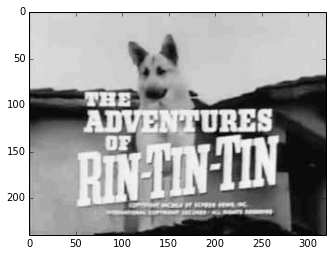

In [21]:
plt.imshow(rintin2, cmap = "Greys_r")

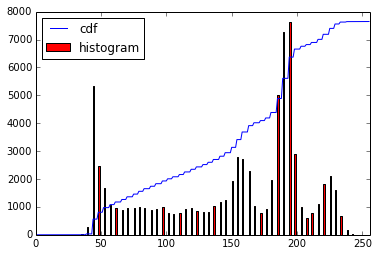

In [22]:
hist,bins = np.histogram(rintin3.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin3.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#### Já este histograma nota-se que aproveita muito mais as faixas de cores

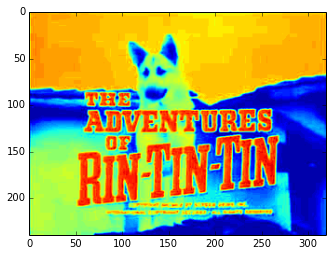

In [23]:
plt.imshow(rintin3)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [24]:
box = cv2.imread("hall_box_battery1.jpg")

In [25]:
box_rgb = cv2.cvtColor(box, cv2.COLOR_BGR2RGB)

In [26]:
box_r = box_rgb[:,:,0]
box_g = box_rgb[:,:,1]
box_b = box_rgb[:,:,2]

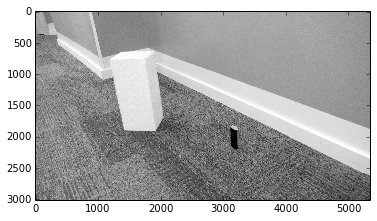

In [27]:
plt.imshow(box_r, cmap = "Greys_r")

Canal R

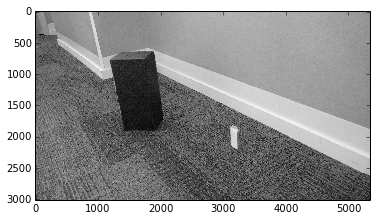

In [28]:
plt.imshow(box_b, cmap = "Greys_r")

Canal B

#### Embora o rodapé chegue a atrapalhar um pouco, ao separar os canais R e B podemos identificar a caixa e a bateria, que estão destacadas em branco

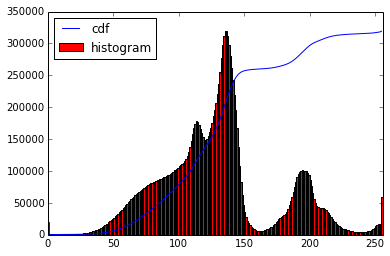

In [29]:
hist,bins = np.histogram(box_r.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(box_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [30]:
R = box_r - box_g - box_b

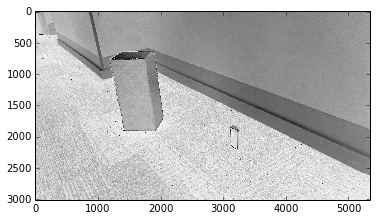

In [31]:
plt.imshow(R,cmap = "Greys_r")

In [32]:
R = box_r - box_g

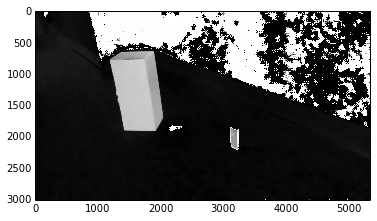

In [33]:
plt.imshow(R,cmap="Greys_r")

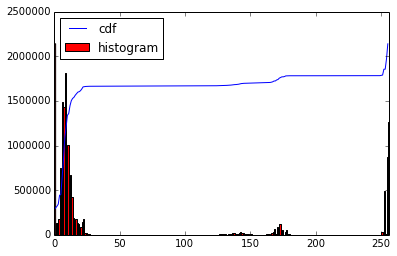

In [34]:
hist,bins = np.histogram(R.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(R.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#### Analisando a imagem podemos perceber que tirando a caixa e a bateria, o resto da imagem varia entre preto e branco, agora no histograma vemos que a parte que varia entre preto e branco está mais ou menos entre 100 e 200. O problema é que dentro desse intervalo está a caixa e a bateria, como podemos ver na proxima imagem, fica mais complicado para separar apenas a caixa.

In [35]:
print(len(R),len(R[0]))

(3006, 5344)


In [36]:
def paint_R(pxl):
    if pxl > 100 and pxl < 200:
        return 255
    else:
        return 0

In [37]:
#for i in range(0,3007):
 #   for j in range(0,5345):
  #      find_R[i][j] +=[paint_R(R[i][j])]

In [38]:
find_r = np.vectorize(paint_R)

In [39]:
find_R = [find_r(i) for i in R]

In [40]:
find_R  = np.asarray(find_R)

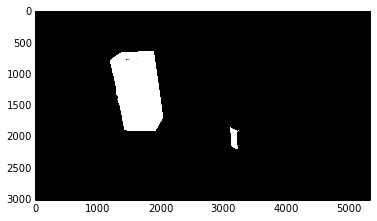

In [41]:
plt.imshow(find_R, cmap = "Greys_r")

#### Agora vamos ver o caso para o canal azul

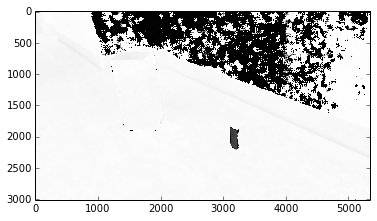

In [42]:
B = box_b - box_g

plt.imshow(B,cmap="Greys_r")

#### Nesse caso podemos ver que fica apenas a bateria, como desejado

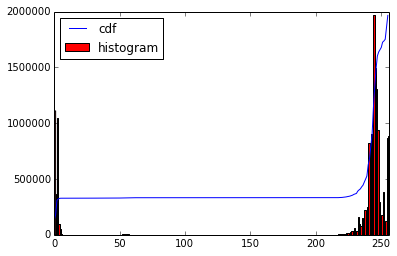

In [43]:
hist,bins = np.histogram(B.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(B.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#### Como a bateria é pequena, contém poucos pixels, mas podemos nota-los na área perto do 50, então estimo que os pixels que formam a bateria estão entre 20 e 80

In [44]:
def paint_B(pxl):
    if pxl>20 and pxl<80:
        return 255
    else:
        return 0

In [45]:
find_b = np.vectorize(paint_B)
find_B = [find_b(i) for i in B]
find_B = np.asarray(find_B)

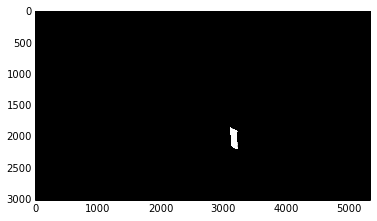

In [46]:
plt.imshow(find_B, cmap = "Greys_r")

#### vou então fazer uma função que compara as duas imagens, tentando obter a diferença, que é a caixa vermelha

In [ ]:
def compare(img1,img2):
    if img1 == img2:
        return 0
    else:
        return 255

In [ ]:
diference = np.vectorize(compare)

In [ ]:
just_box = []
for i in range(len(find_R)):
    just_box.append(diference(find_R[i],find_B[i]))

In [ ]:
just_box = np.asarray(just_box)

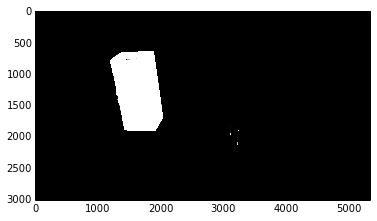

In [52]:
plt.imshow(just_box,cmap="Greys_r")